In [8]:
'''
Name : Peter Sunny Shanthveer Markappa
Student No.: R00208303
Subject: Practical Machine Learning
Assignment: 02
'''


# !pip install imblearn

'\nName : Peter Sunny Shanthveer Markappa\nStudent No.: R00208303\nSubject: Practical Machine Learning\nAssignment: 02\n'

In [16]:
import re
import pickle
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.preprocessing import OneHotEncoder
from pandas_profiling import ProfileReport
from sklearn.model_selection import cross_val_score
import sweetviz 
from sklearn.feature_selection import RFE
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import learning_curve, GridSearchCV

In [17]:
smote = SMOTE()
enc = OneHotEncoder(handle_unknown='ignore')

Shape of your Data Set loaded: (48842, 15)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    15 Predictors classified...
        1 variables removed since they were ID or low-information variables
Number of All Scatter Plots = 21


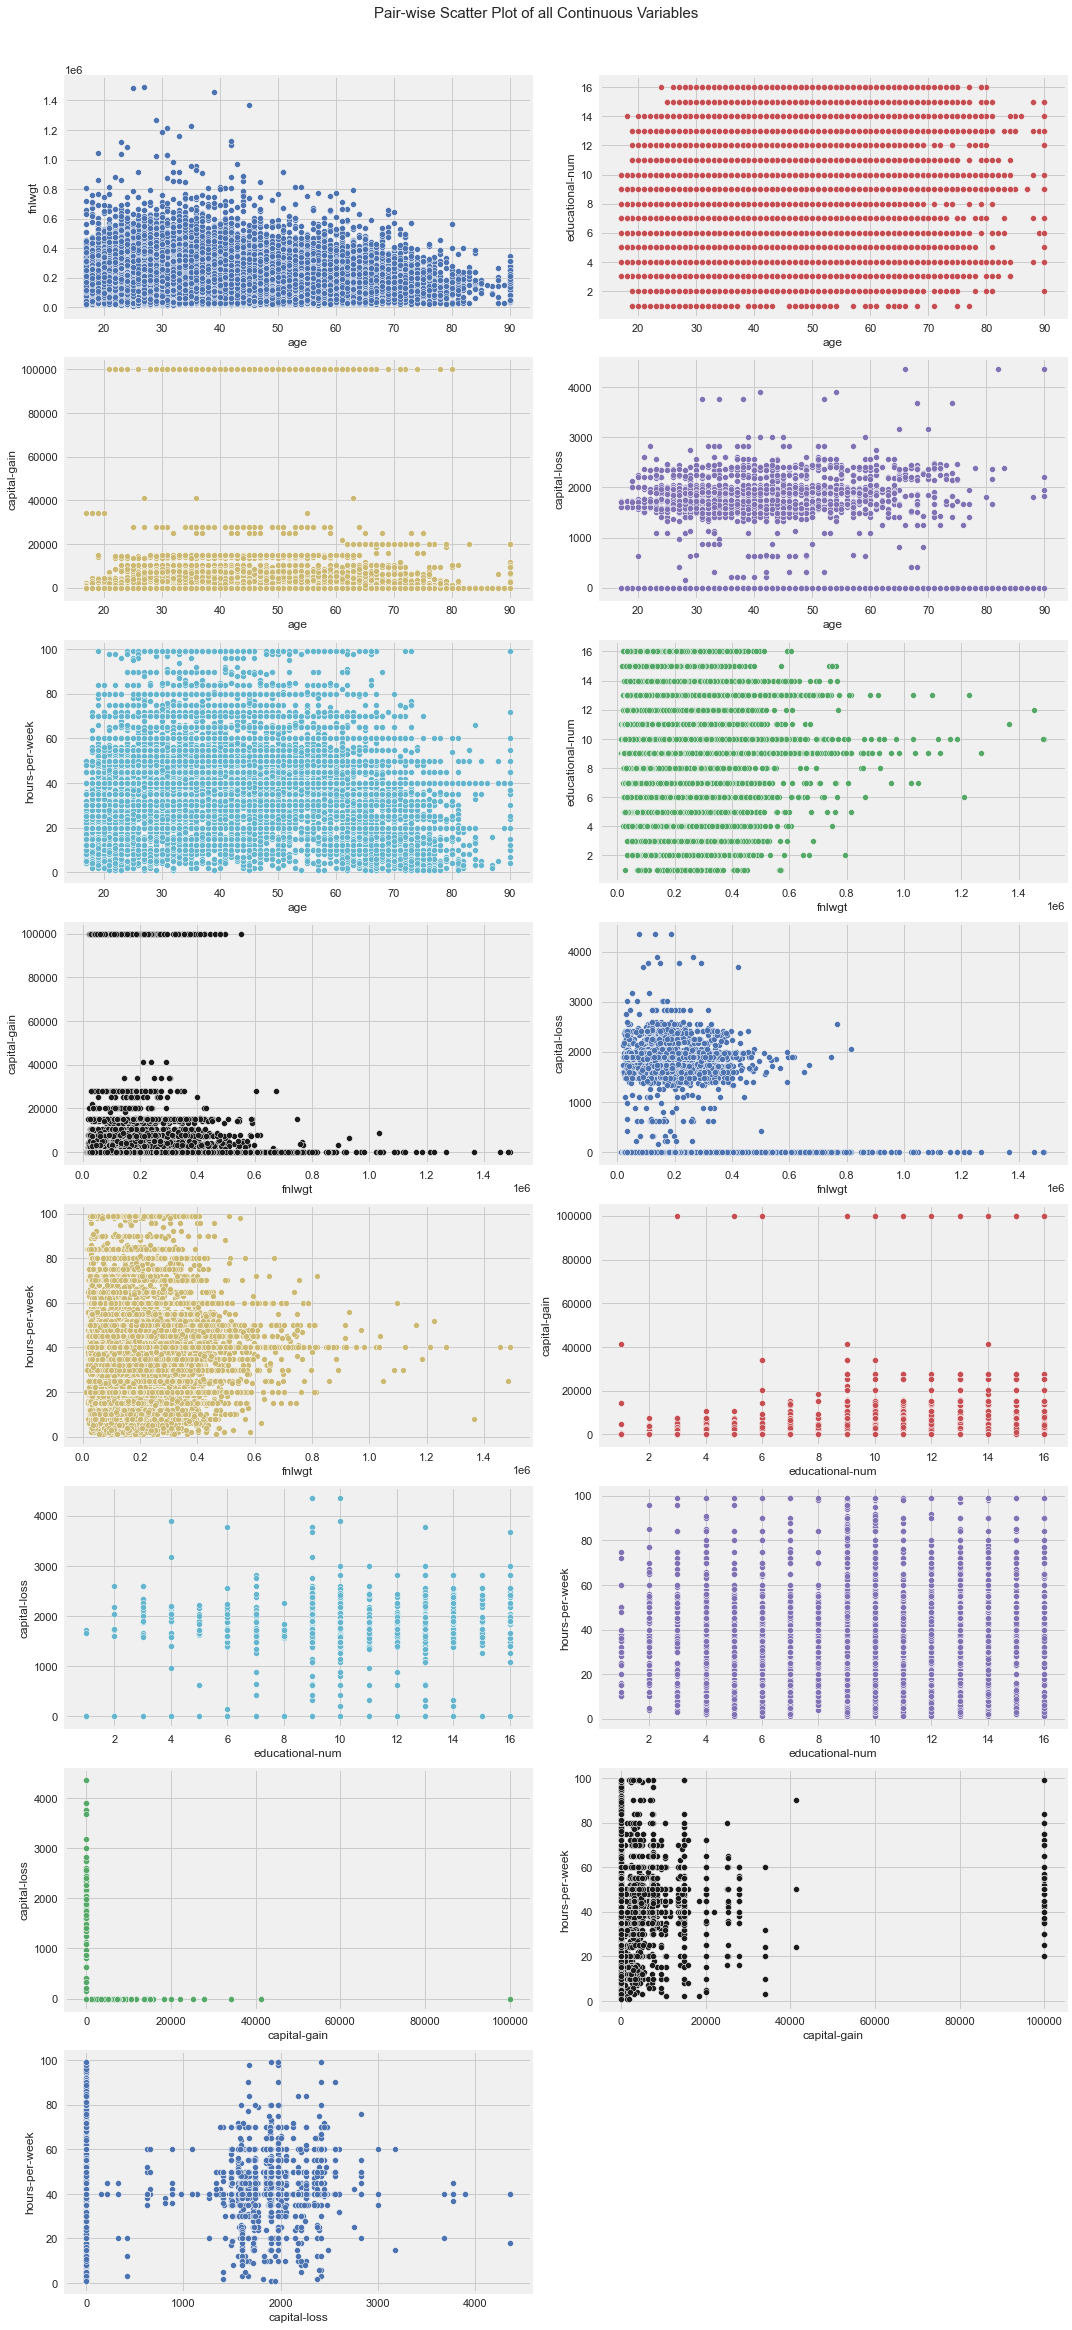

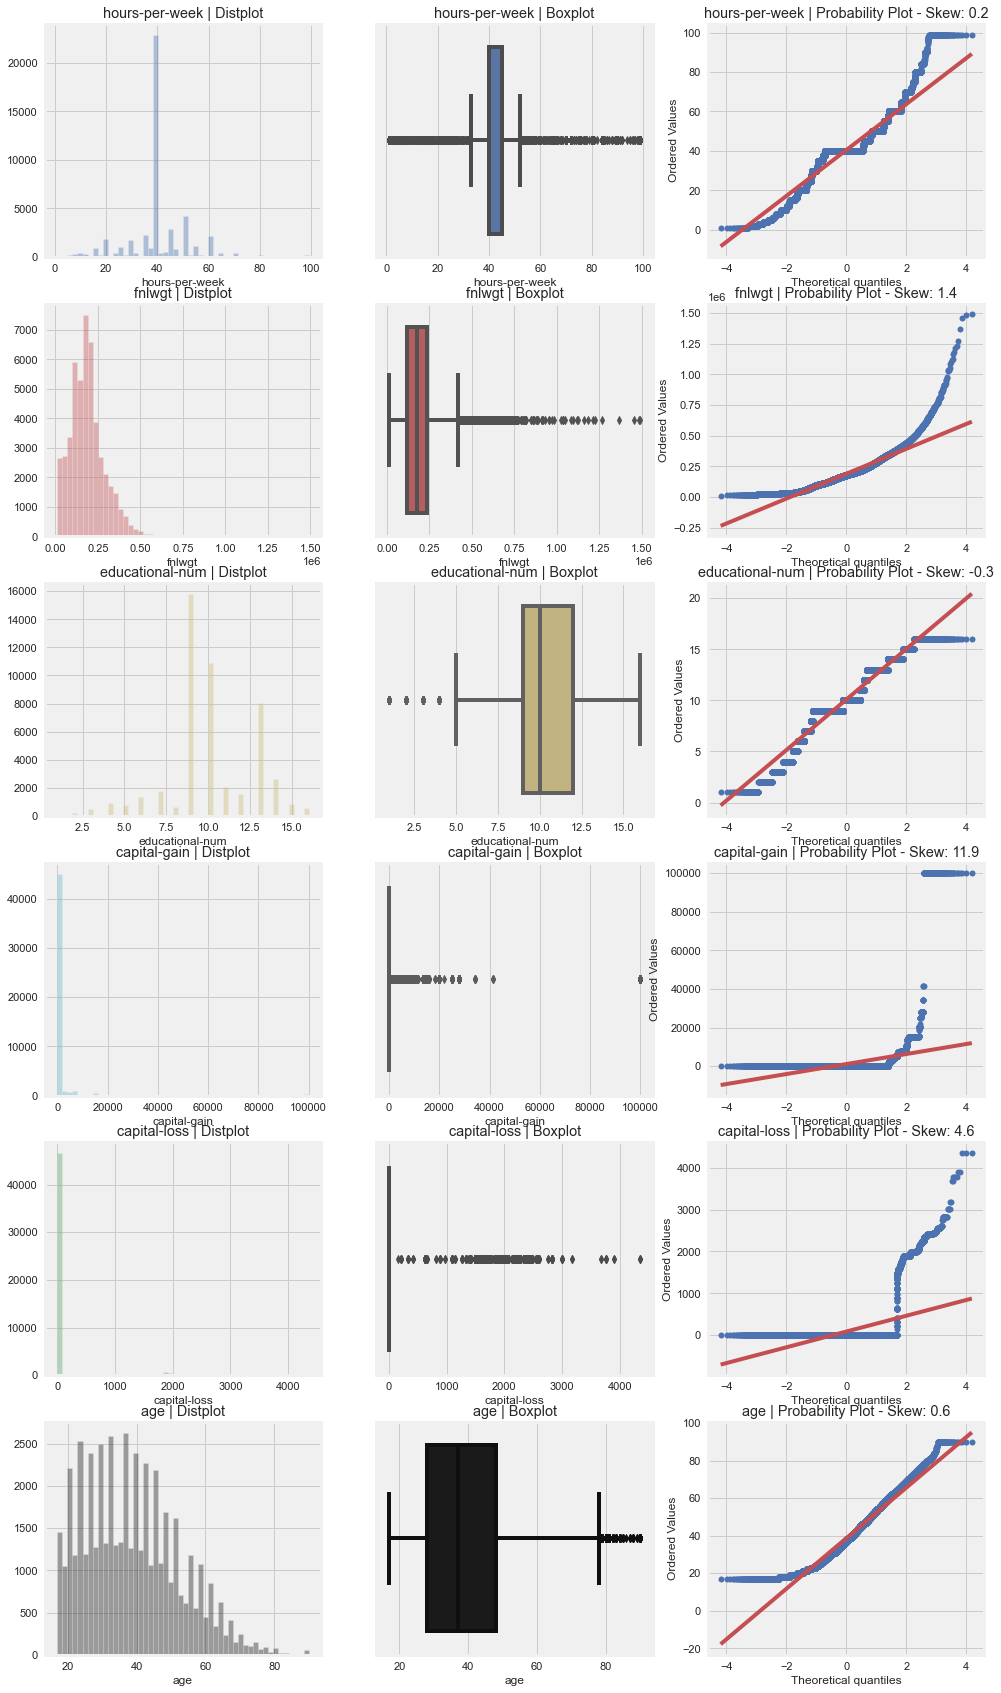

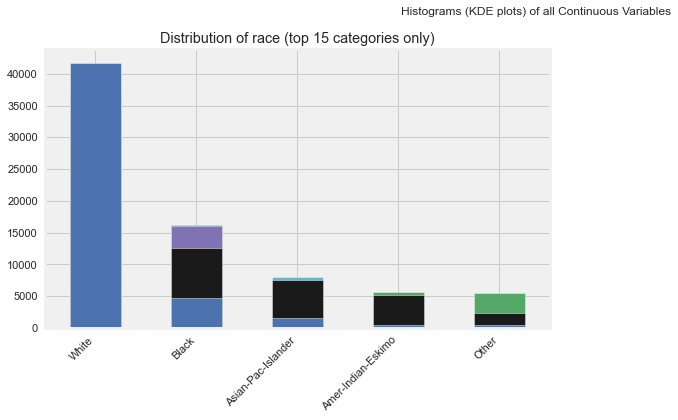

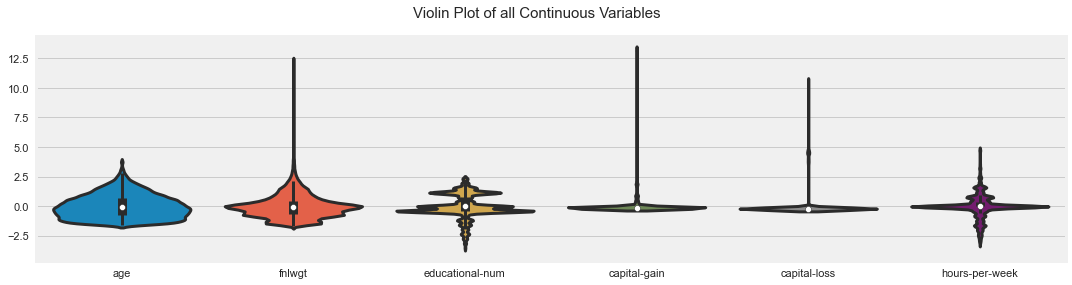

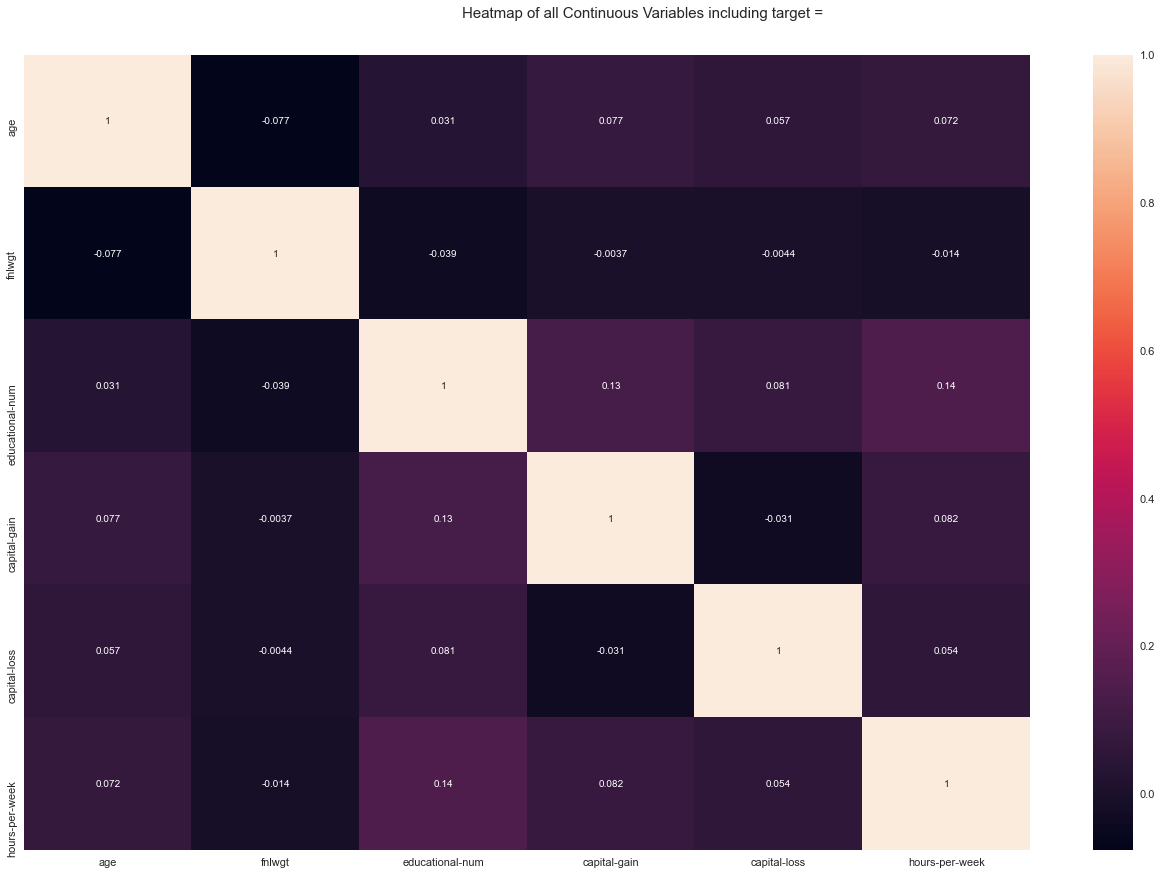

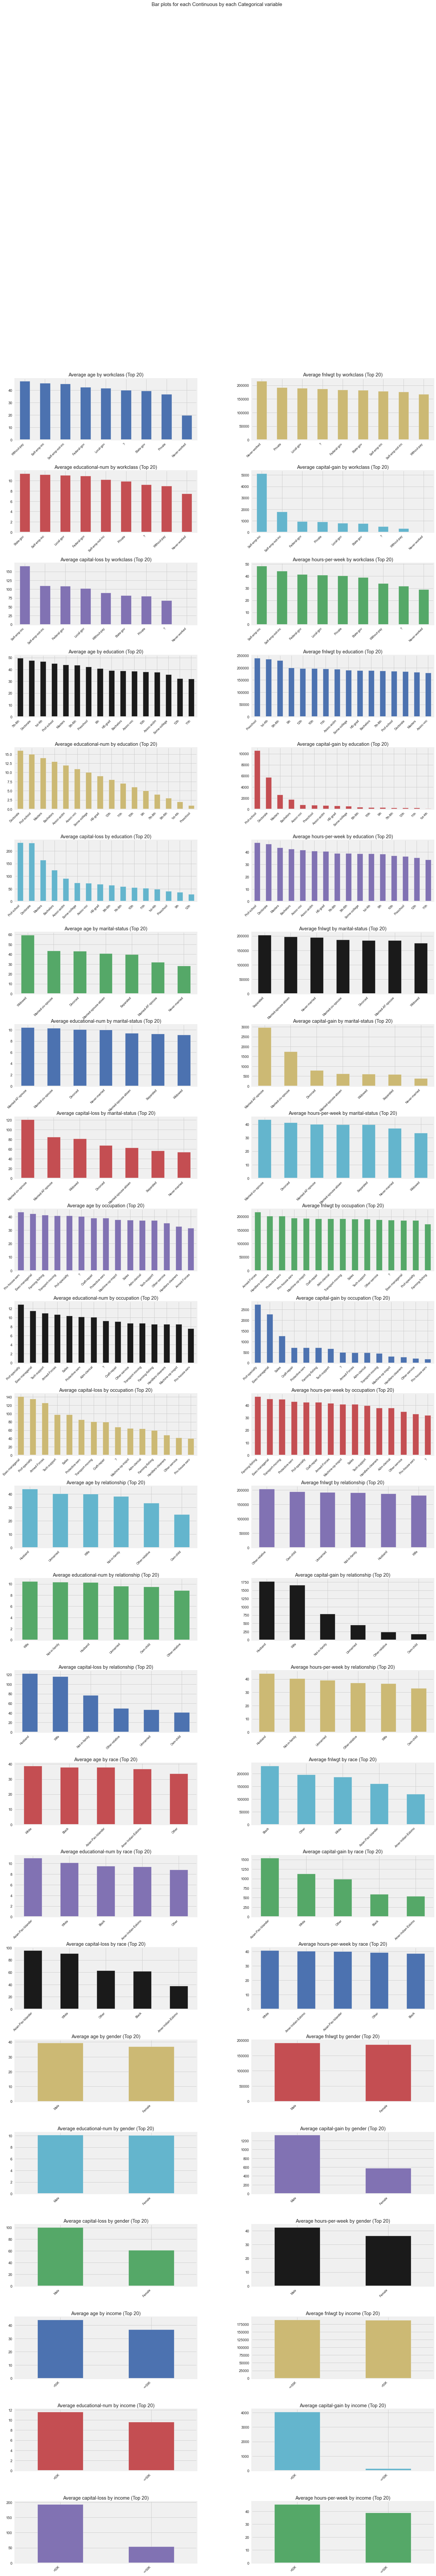

Time to run AutoViz (in seconds) = 26

 ###################### VISUALIZATION Completed ########################


In [18]:
from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()
df = AV.AutoViz('adult.csv')

In [20]:
df = pd.read_csv("adult.csv")
df = df.replace(r'^\?s*?$', np.nan, regex=True)
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [21]:
### Read the csv data and store in a variable called df ###
df = pd.read_csv("adult.csv")

def remove_spl(df):
  ### Income value is replaced with boolean 0 (<=50K) else 1 ###
  df["income_processed"] = np.where(df['income'] == '<=50K',0,1)

  ### Drop original income column from the datasets
  df = df.drop('income',axis=1)

  ### Replace special character with nan ###
  df = df.replace(r'^\?s*?$', np.nan, regex=True)

  return df

In [22]:
df = remove_spl(df)

In [23]:
### Preparing data for visualization ###
my_report = sweetviz.analyze([df, "Train"],target_feat='income_processed')

                                             |                                             | [  0%]   00:00 ->…


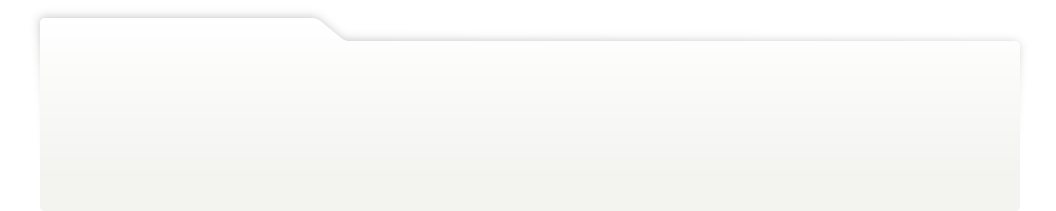
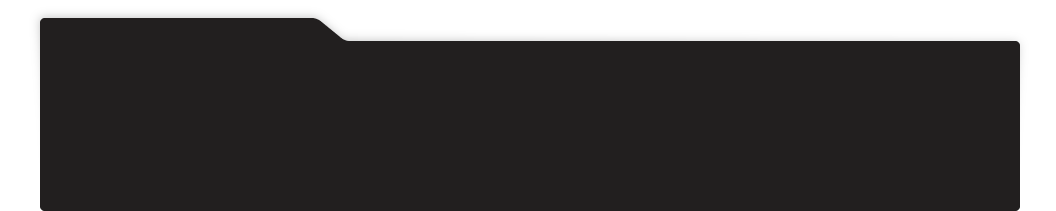
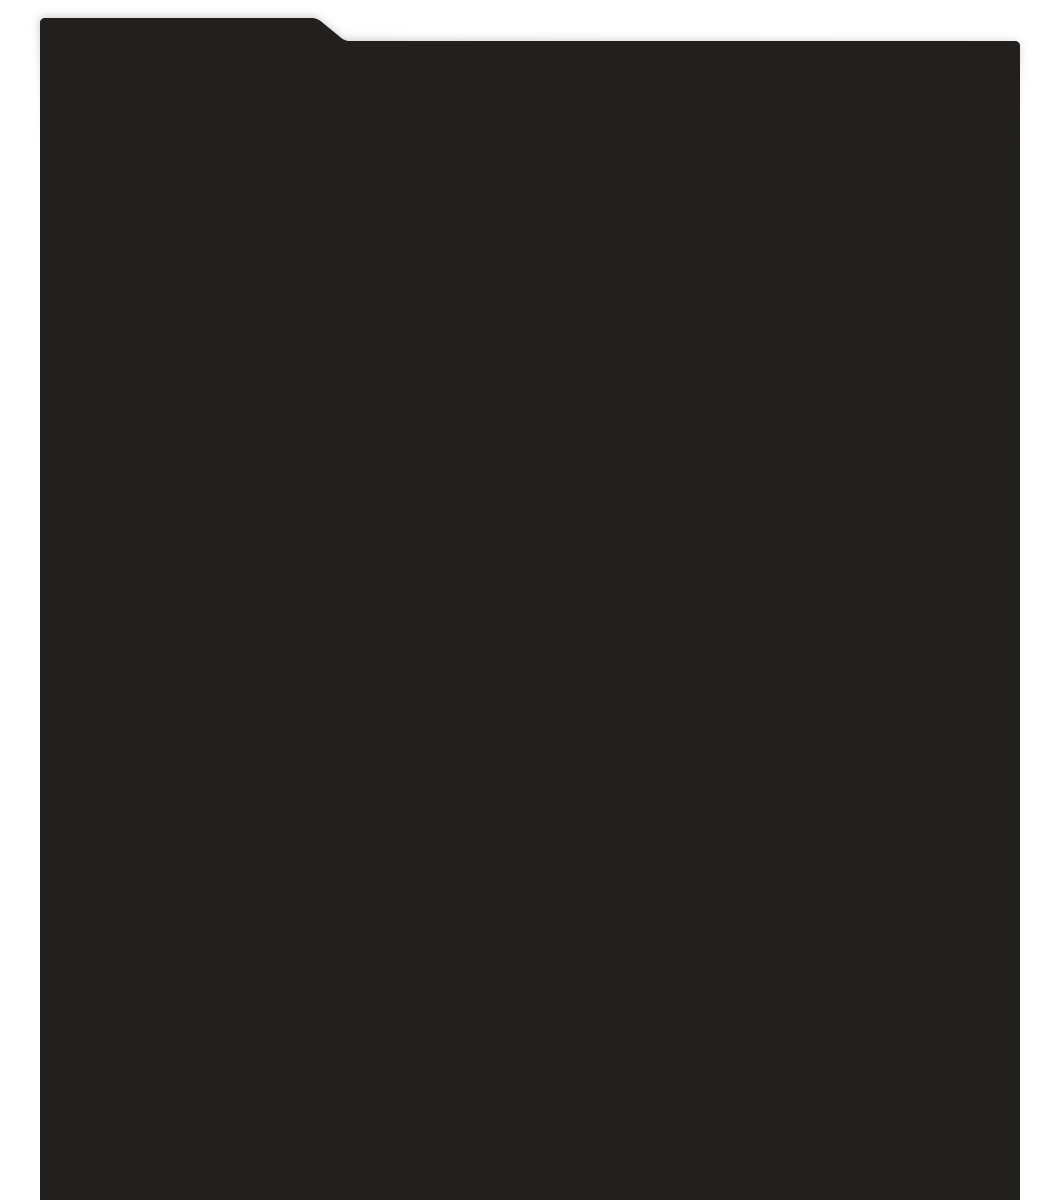
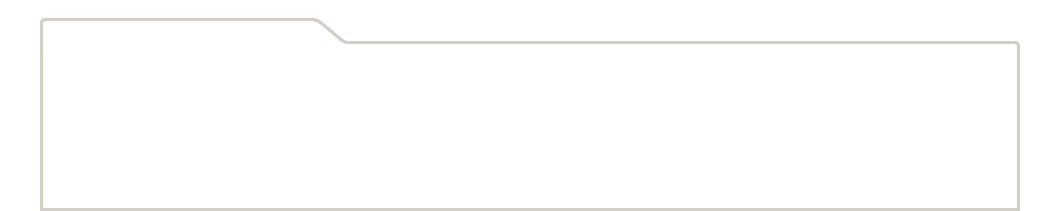
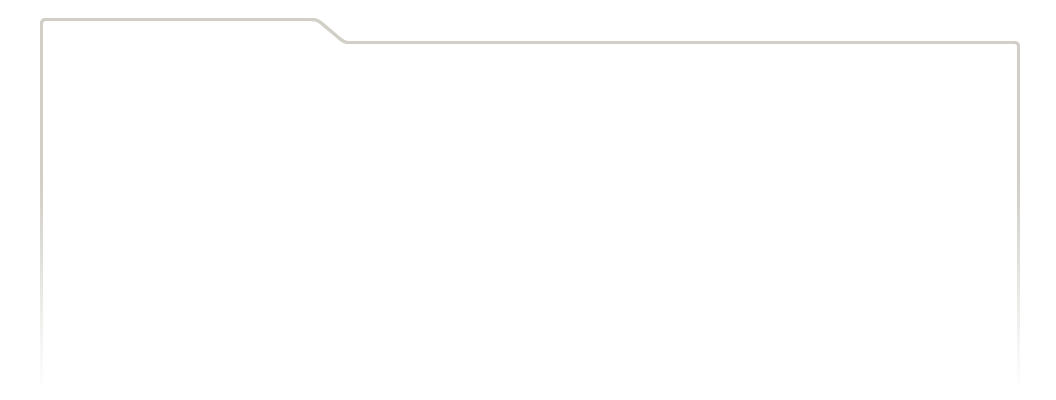
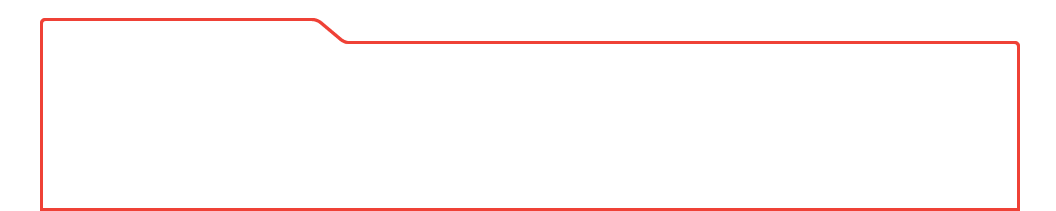
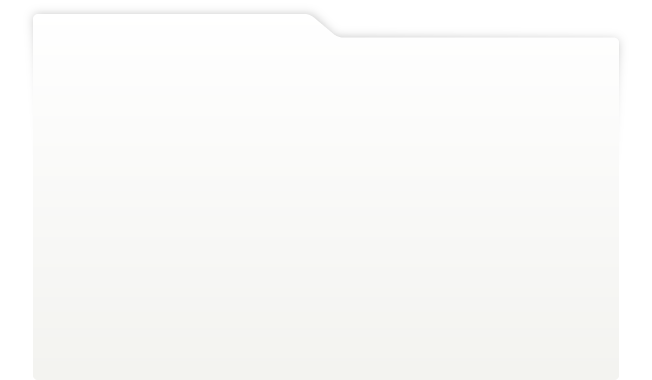
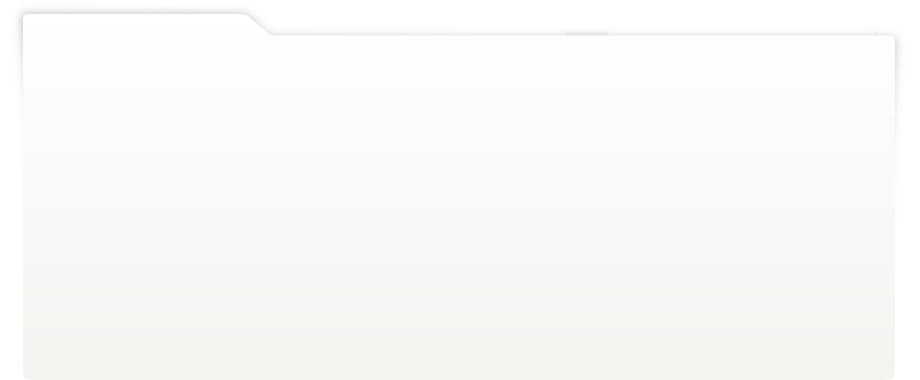
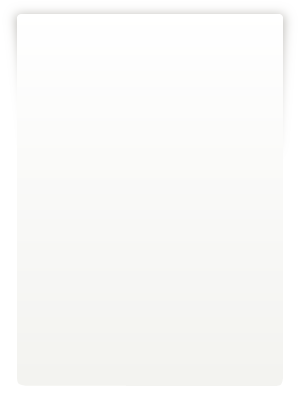
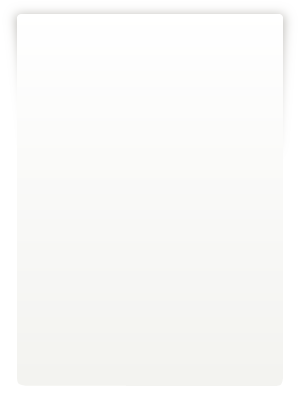
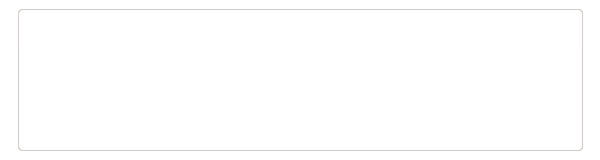
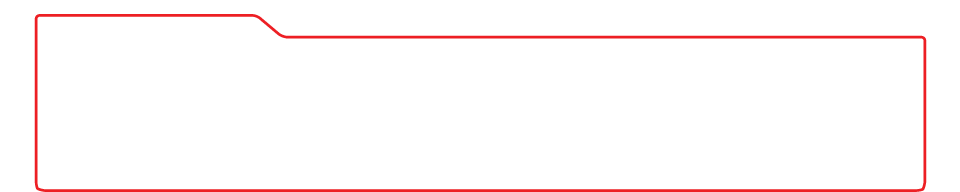
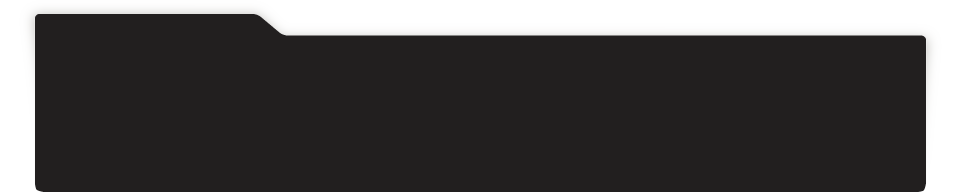
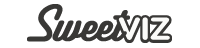
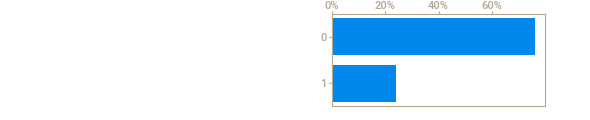
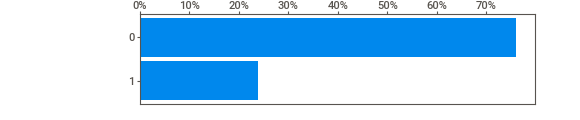
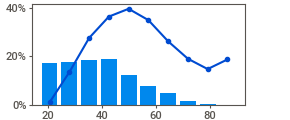
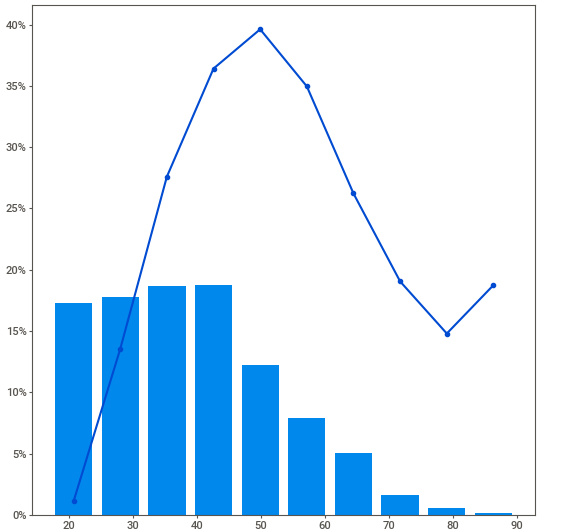
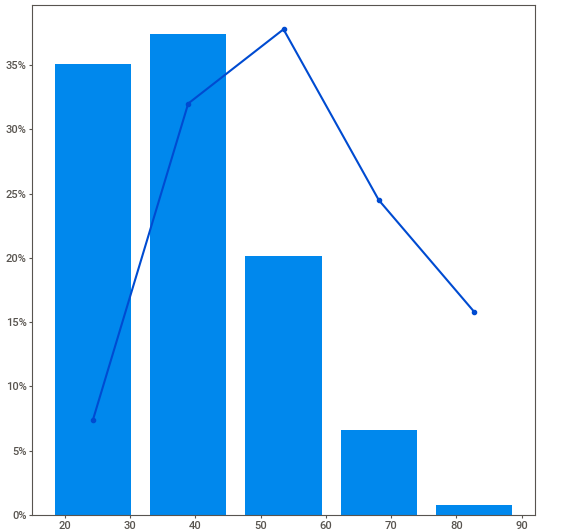
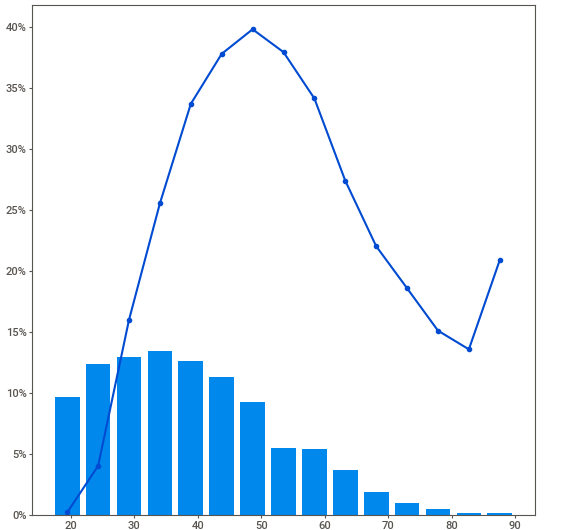
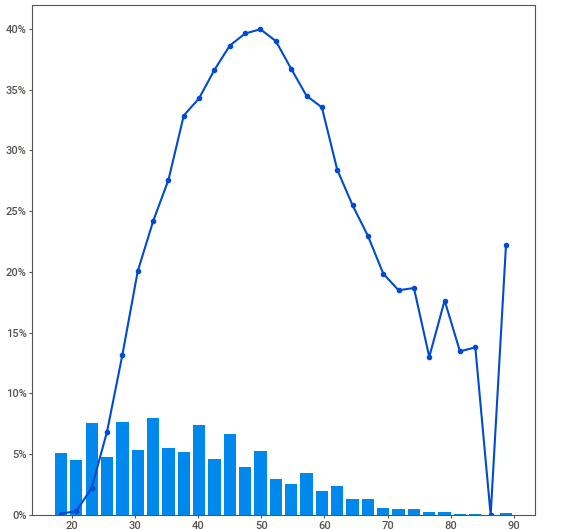
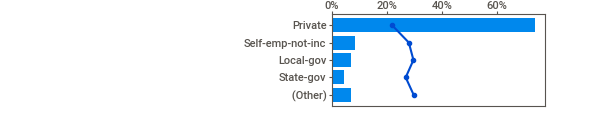
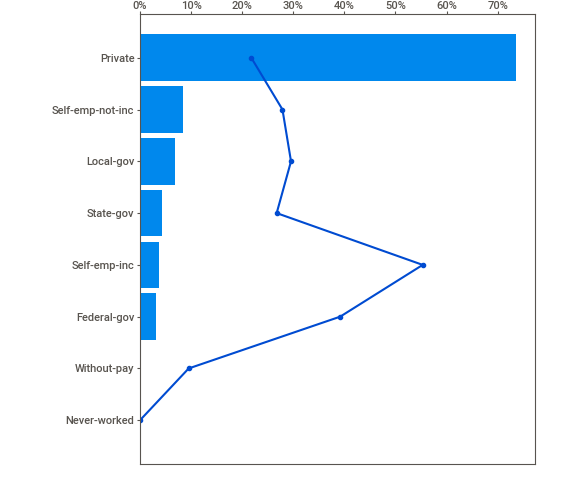
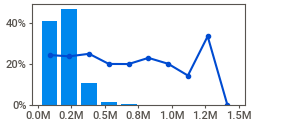
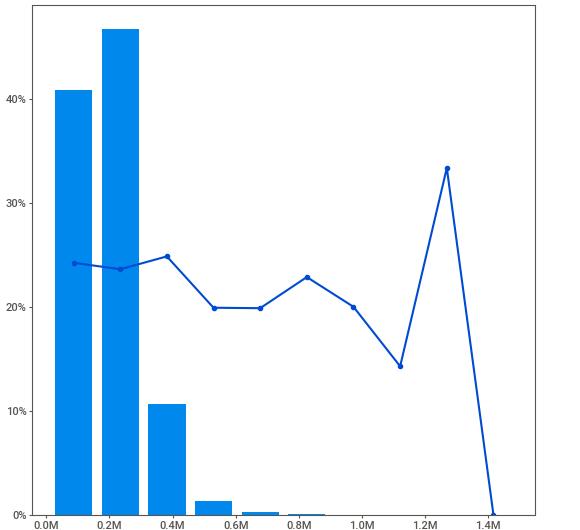
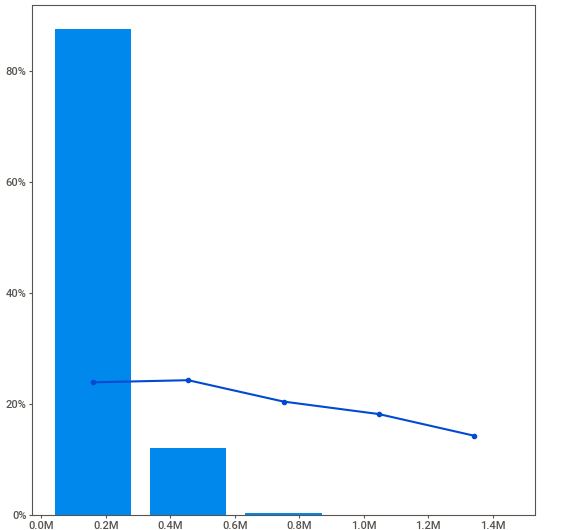
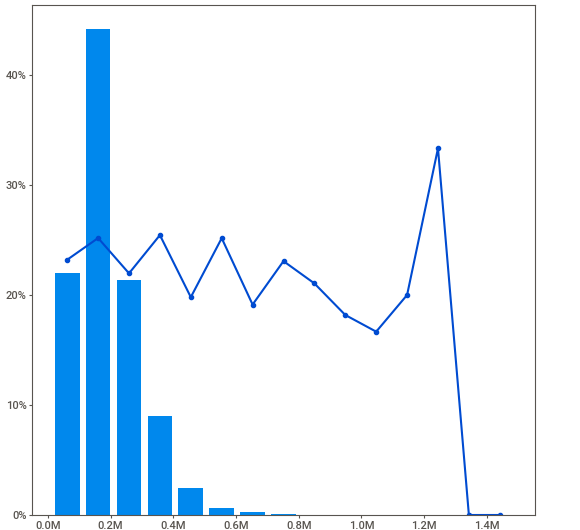
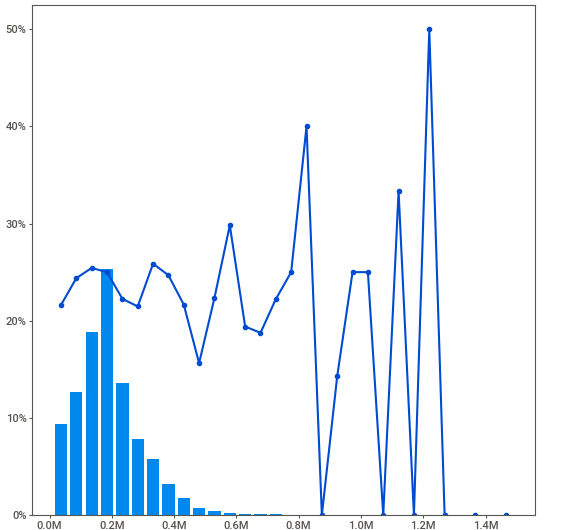
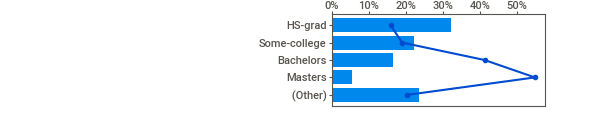
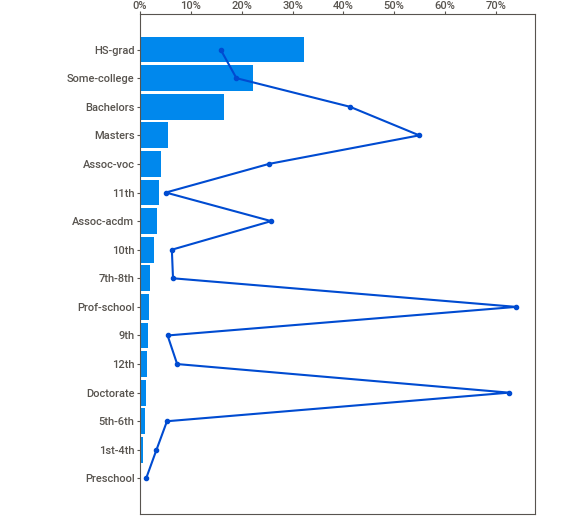
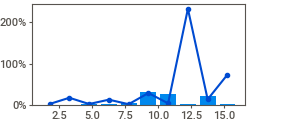
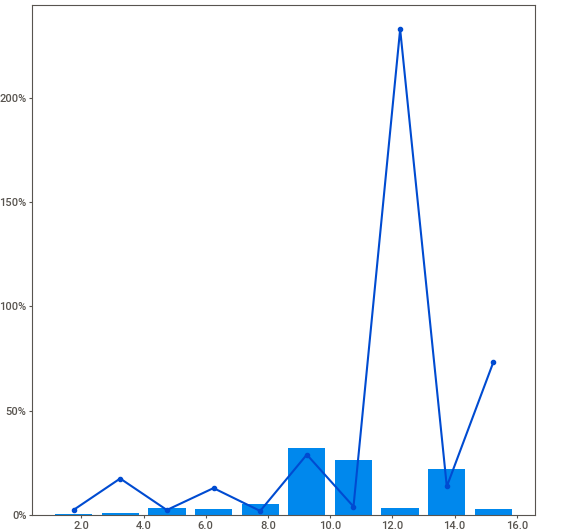
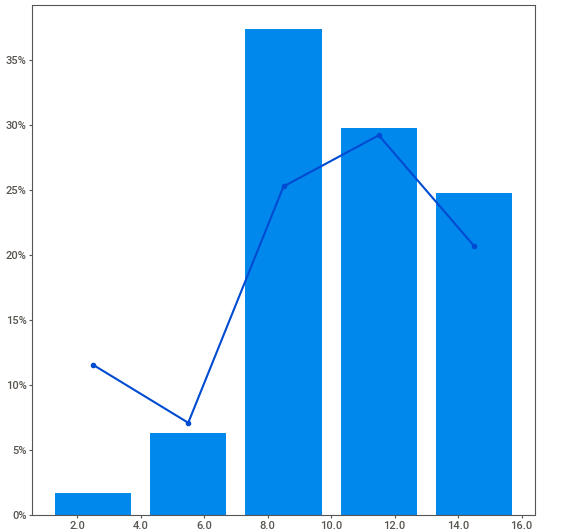
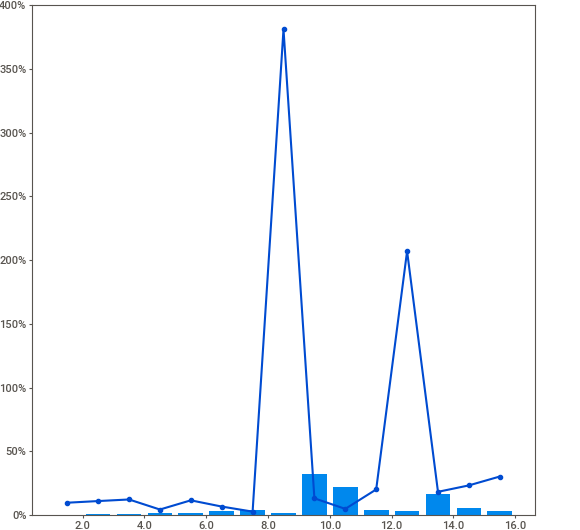
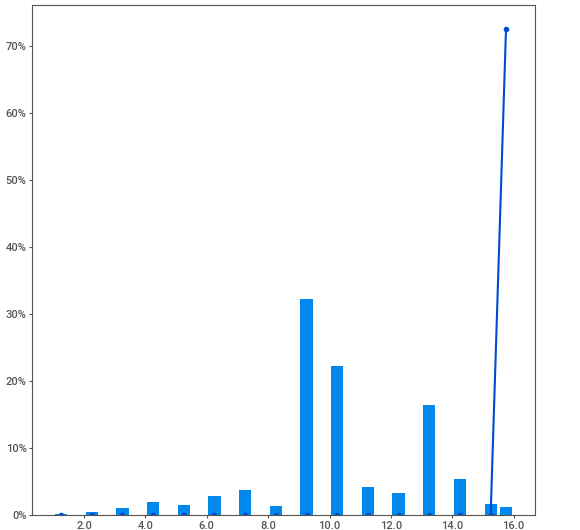
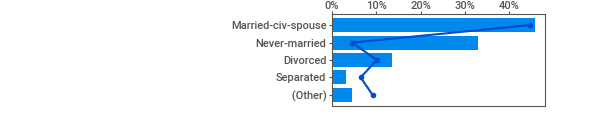
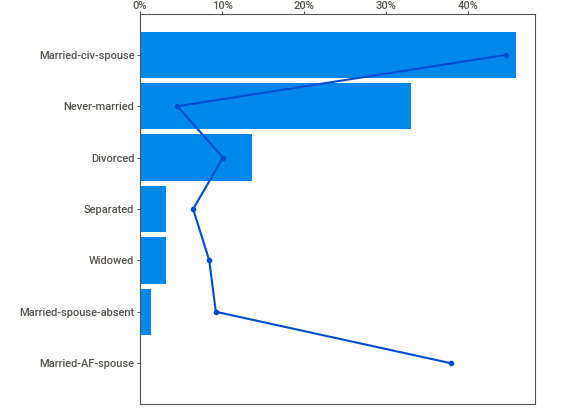
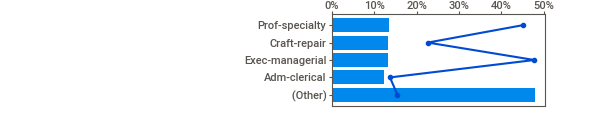
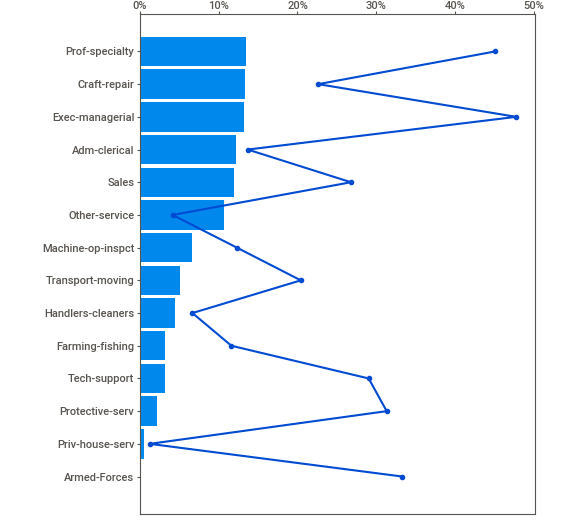
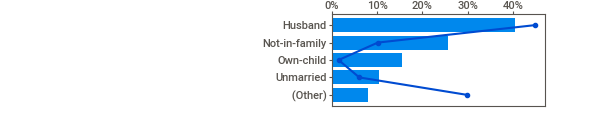
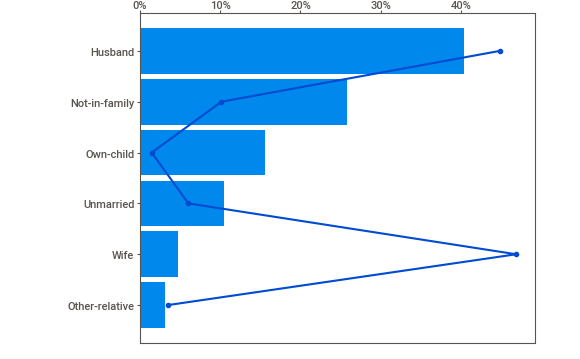
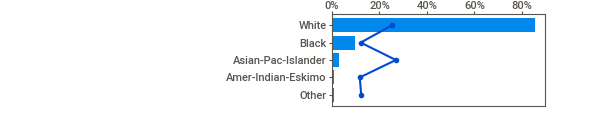
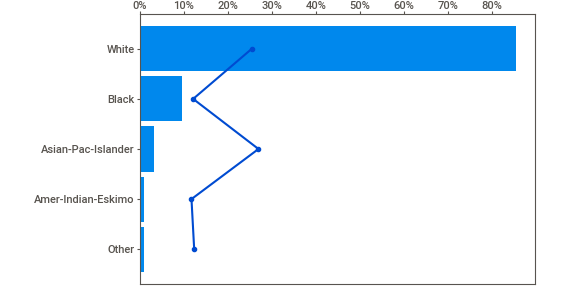
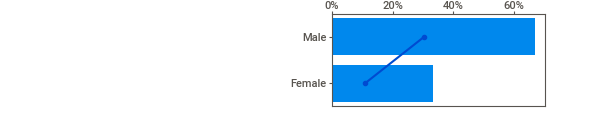
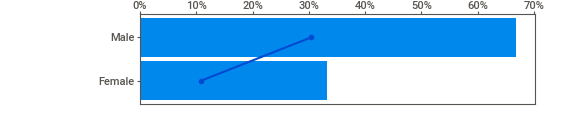
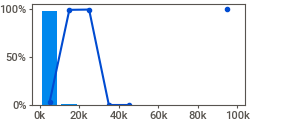
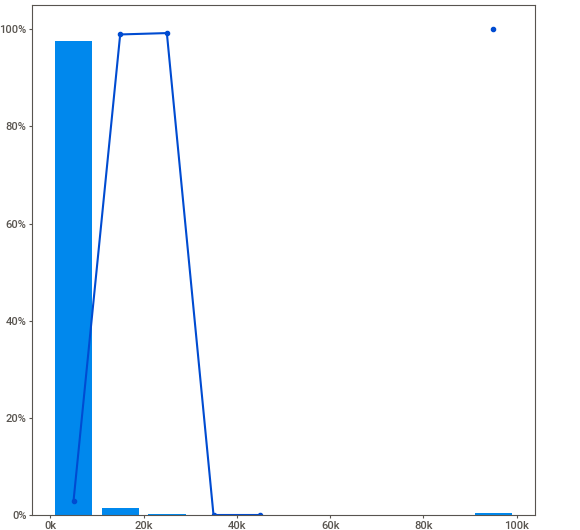
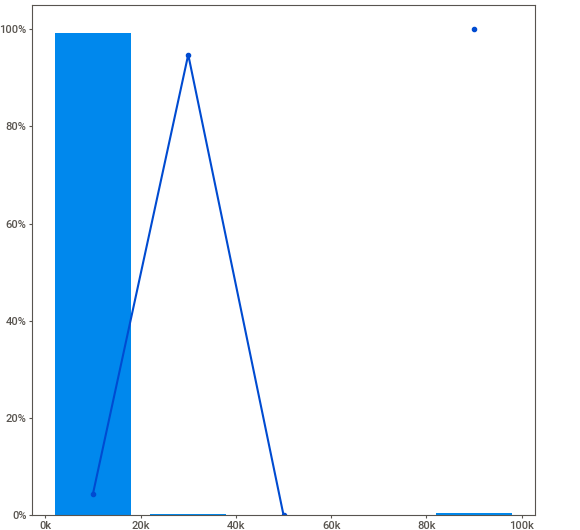
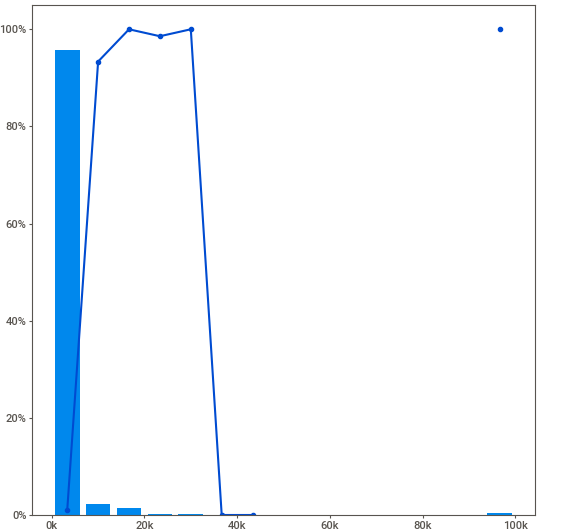
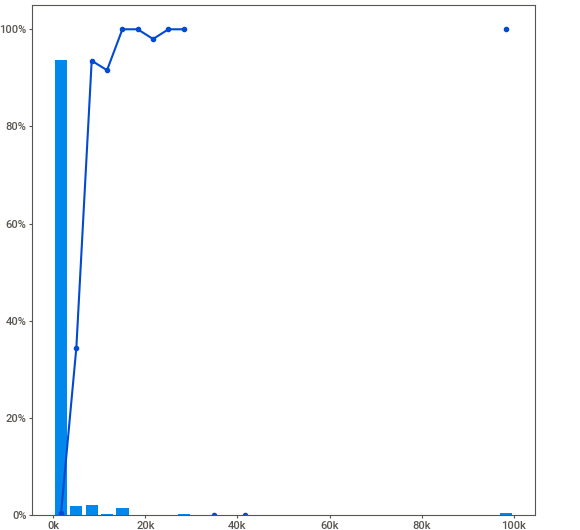
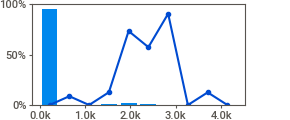
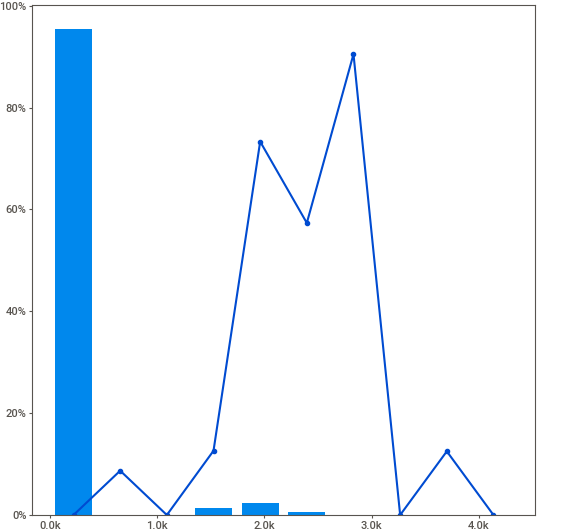
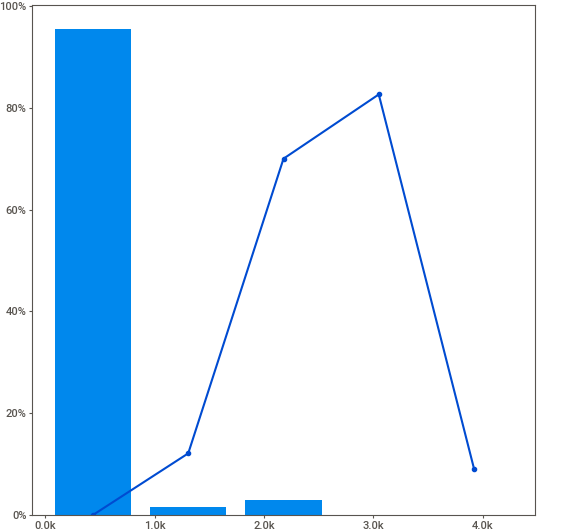
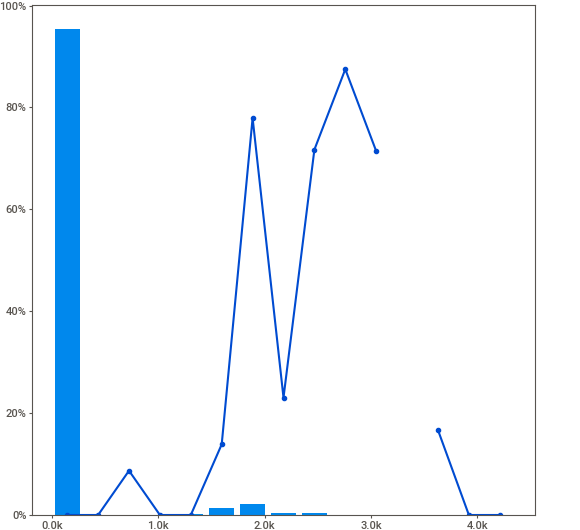
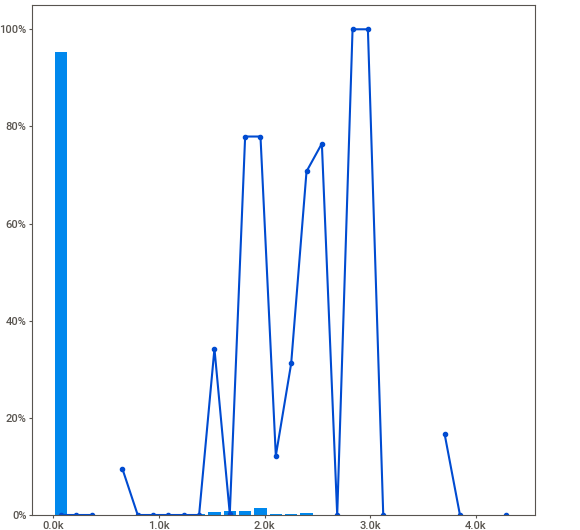
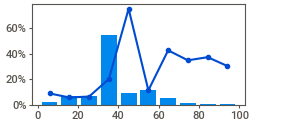
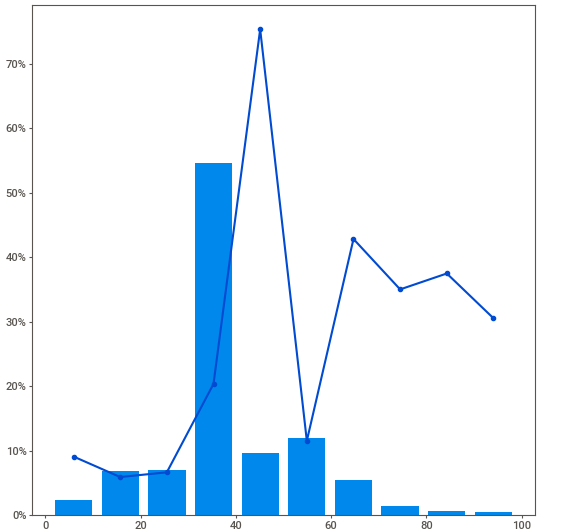
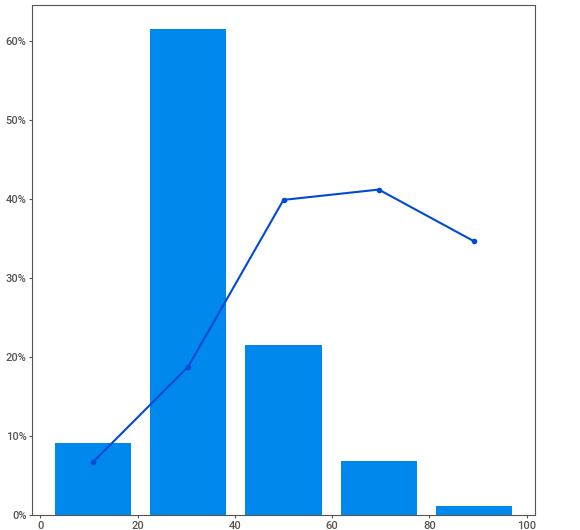
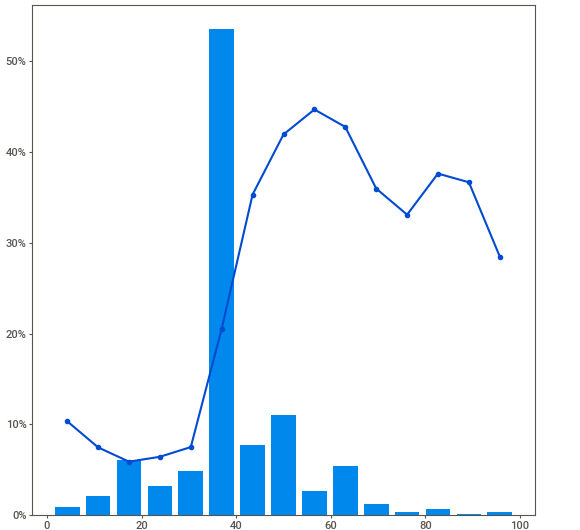
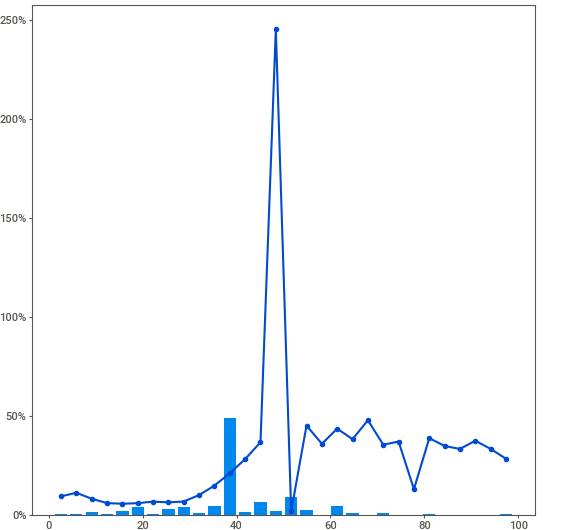
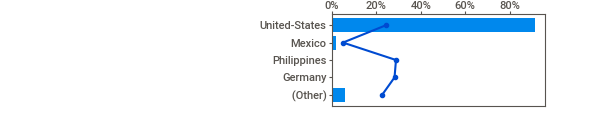
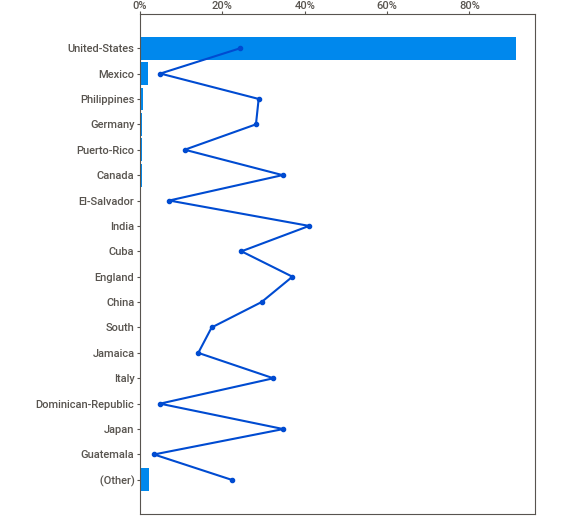
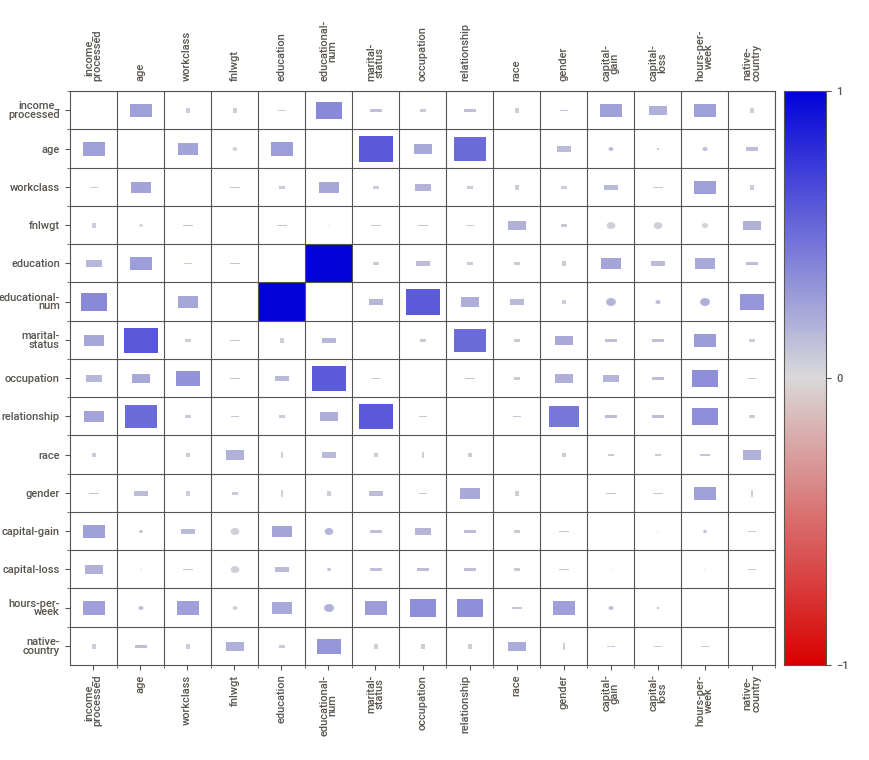
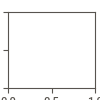

In [24]:
### visualization report ###
my_report.show_notebook()

In [25]:
### missing value imputation ###
from sklearn.impute import SimpleImputer

def data_preprocessing(df):
  ### imputation of missing value with most frequent/mode value in the datasets for all categoricall variable ###
  imputer = SimpleImputer(strategy='most_frequent', missing_values=np.nan)
  df_imputer = pd.DataFrame(imputer.fit_transform(df),columns=df.columns,index=df.index)

  ### Fitting one hot encoding to the categorical features
  enc_df = pd.DataFrame(enc.fit_transform(df_imputer[['workclass','education','marital-status', 'occupation', 'relationship', 'race', 'gender','native-country']]).toarray())
  non_enc_df = df_imputer[['age','fnlwgt','educational-num','capital-gain','capital-loss','hours-per-week','income_processed']]

  ### concatinating the encodied data with original data
  final_df = pd.concat([enc_df,non_enc_df],axis=1)
  ### Drop Unnecessary columns from the datasets ###
  final_df = final_df.drop(['fnlwgt','educational-num'],axis=1)

  return final_df

In [26]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income_processed
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382,0.239282
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444,0.426649
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [27]:
final_df = data_preprocessing(df)
final_df.shape

(48842, 104)

In [28]:
import pickle
with open("encoder.pkl", "wb") as f: 
    pickle.dump(final_df, f)

In [29]:
#### Split data into train and test ###
train, test = train_test_split(final_df  , random_state=1, test_size=0.30, shuffle=True)

train[['age','capital-gain','capital-loss','hours-per-week']] =train[['age','capital-gain','capital-loss','hours-per-week']].apply(pd.to_numeric)
test[['age','capital-gain','capital-loss','hours-per-week']] =test[['age','capital-gain','capital-loss','hours-per-week']].apply(pd.to_numeric)

Y_train = pd.DataFrame(train['income_processed']).astype('int')
X_train = train.drop('income_processed',axis=1)

<AxesSubplot:title={'center':'count (target)'}>

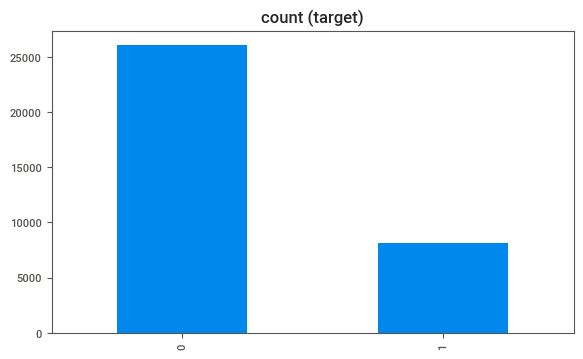

In [30]:
Y_train['income_processed'].value_counts().plot(kind='bar', title='count (target)')

In [31]:
### Data Balancing for train datasets ###

X_train, Y_train = smote.fit_resample(X_train, Y_train)

Y_test = pd.DataFrame(test['income_processed']).astype('int')
X_test = test.drop('income_processed',axis=1)

In [32]:
### Data Balancing for test datasets ###
X_test, Y_test = smote.fit_resample(X_train, Y_train)

<AxesSubplot:title={'center':'count (target)'}>

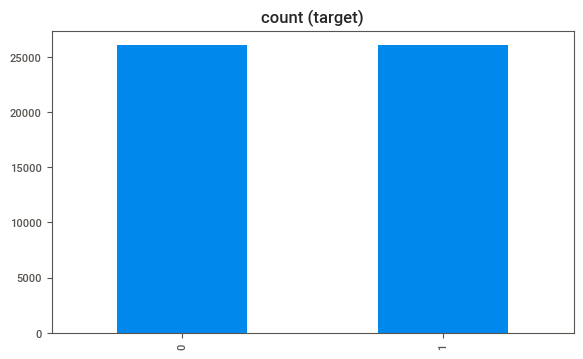

In [28]:
Y_train['income_processed'].value_counts().plot(kind='bar', title='count (target)')

In [56]:
# models to test
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
classifiers = [
    LogisticRegression(solver="sag", random_state=1),
    LinearSVC(random_state=1),
    RandomForestClassifier(random_state=1),
    GradientBoostingClassifier(n_estimators=100),
    BaggingClassifier(n_estimators=100),
    SVC(gamma='scale'),
    DecisionTreeClassifier(),
    XGBClassifier(
        random_state=1,
        solver="adam",
        hidden_layer_sizes=(12, 12, 12),
        activation="relu",
        early_stopping=True,
        n_iter_no_change=1,
        silent=True,
    ),
]

In [57]:
# get names of the objects in list (too lazy for c&p...)
names = [re.match(r"[^\(]+", name.__str__())[0] for name in classifiers]
print(f"Classifiers to test: {names}")
Y_train.columns


Classifiers to test: ['LogisticRegression', 'LinearSVC', 'RandomForestClassifier', 'GradientBoostingClassifier', 'BaggingClassifier', 'SVC', 'DecisionTreeClassifier', 'XGBClassifier']


Index(['income_processed'], dtype='object')

In [58]:
Y_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52086 entries, 0 to 52085
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   income_processed  52086 non-null  int32
dtypes: int32(1)
memory usage: 203.6 KB


In [55]:
# test all classifiers and save pred. results on test data
results = {}
score = {}
for name, clf in zip(names, classifiers):
    print(f"Training classifier: {name}")
#     clf = GridSearchCV(clf, param_grid = param_grid, cv = 5, verbose=True, n_jobs=-1)
    clf.fit(X_train, Y_train)
    clfa_score = cross_val_score(clf,X_train,Y_train,cv=10)
    score[name] = clfa_score
    pickle.dump(clf, open(name +'_model.pkl', 'wb'))
    prediction = clf.predict(X_test)
    report = sklearn.metrics.classification_report(Y_test, prediction)
    results[name] = report

Training classifier: LogisticRegression
Training classifier: LinearSVC
Training classifier: RandomForestClassifier
Training classifier: GradientBoostingClassifier
Training classifier: BaggingClassifier
Training classifier: SVC
Training classifier: DecisionTreeClassifier
Training classifier: XGBClassifier
[15:18:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "activation", "early_stopping", "hidden_layer_sizes", "n_iter_no_change", "silent", "solver" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:18:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logi

[15:20:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "activation", "early_stopping", "hidden_layer_sizes", "n_iter_no_change", "silent", "solver" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:20:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [59]:
#### 10 fold cross validation accuracy score ####
score
df_score = pd.DataFrame(score)

# Storing the score in .csv file
df_score.to_csv("k_fold_cross_validations.csv")

In [60]:
pipe = Pipeline([('classifier' , RandomForestClassifier())])
param_grid = [
    {'classifier' : [RandomForestClassifier()],
    'classifier__n_estimators' : list(range(10,101,10)),
    'classifier__max_features' : list(range(6,32,5))}
]

In [61]:
# Prediction results
for k, v in results.items():
    print(f"Results for {k}:")
    print(f"{v}\n")

Results for LogisticRegression:
              precision    recall  f1-score   support

           0       0.57      0.93      0.71     26043
           1       0.81      0.31      0.45     26043

    accuracy                           0.62     52086
   macro avg       0.69      0.62      0.58     52086
weighted avg       0.69      0.62      0.58     52086


Results for LinearSVC:
              precision    recall  f1-score   support

           0       0.77      0.71      0.74     26043
           1       0.73      0.79      0.76     26043

    accuracy                           0.75     52086
   macro avg       0.75      0.75      0.75     52086
weighted avg       0.75      0.75      0.75     52086


Results for RandomForestClassifier:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98     26043
           1       0.98      0.98      0.98     26043

    accuracy                           0.98     52086
   macro avg       0.98      0.98  

In [62]:
# results_df = pd.DataFrame(results,index=False)


### Hyper - Parameter tunning for RandomForestClassifier ####
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [20, 30, 40, 35],
    'max_features': [2, 3],
    'min_samples_leaf': [13, 14, 15],
    'min_samples_split': [18, 10, 12],
    'n_estimators': [100, 200, 300, 400]
} 

In [63]:
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
ml_grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 10, n_jobs = -1, verbose = 2)

In [64]:
# Fit the grid search to the data
ml_grid_search.fit(X_train, Y_train)

ml_best_grid = ml_grid_search.best_estimator_

ml_best_grid

prediction1 = ml_grid_search.predict(X_test)
report1 = sklearn.metrics.classification_report(Y_test, prediction1)

Fitting 10 folds for each of 288 candidates, totalling 2880 fits


In [65]:
d = {report1}
for v in d:
    print(f"{v}\n")

              precision    recall  f1-score   support

           0       0.90      0.81      0.85     26043
           1       0.83      0.91      0.86     26043

    accuracy                           0.86     52086
   macro avg       0.86      0.86      0.86     52086
weighted avg       0.86      0.86      0.86     52086




In [68]:
### Hyper - Parameter tunning for BaggingClassifier ####
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
# Create the parameter grid based on the results of random search 
# param_grid = {
#     'bootstrap': [True],
#     'max_depth': [20, 30, 40, 35],
#     'max_features': [2, 3],
#     'min_samples_leaf': [13, 14, 15],
#     'min_samples_split': [18, 10, 12],
#     'n_estimators': [100, 200, 300, 400]
# }

param_grid = {
    'n_estimators': [100, 200, 300, 400]
}

cv = RepeatedStratifiedKFold(n_splits=10,
                            n_repeats=2,
                            random_state=42
                            )

ml_grid_search = GridSearchCV(estimator = BaggingClassifier(),
                              param_grid = param_grid, 
                              cv = cv,
                              n_jobs = -1,
                              verbose = 2,
                              scoring='accuracy',
                              error_score=0
                             )
result = ml_grid_search.fit(X_train, Y_train)

Fitting 20 folds for each of 4 candidates, totalling 80 fits


In [69]:
print("Best Score for Bagging Classifire", ml_grid_search.best_score_)
print("Best parameter for Bagging Classifire", ml_grid_search.best_params_)


Best Score for Bagging Classifire 0.8940215025748595
Best parameter for Bagging Classifire {'n_estimators': 300}


In [ ]:
#----------------------- End --------------------------------------------